In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [122]:
import os
import time
import uuid
from PIL import Image
import torchvision
import torchvision.transforms.functional as F

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\RHM1983/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-1-25 Python-3.9.7 torch-1.12.0 CUDA:0 (NVIDIA GeForce RTX 2060, 12288MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
# img = 'G:/CSE_498r/project/dataset/images/DSC_0460.JPG'

In [6]:
# result = model(img)
# result.print()

In [7]:
# %matplotlib inline 
# plt.imshow(np.squeeze(result.render()))
# plt.show()

In [8]:
# !cd yolov5 && python train.py --img 640 --batch 32 --epochs 200 --data dataset.yml --weights yolov5s.pt --workers 2 --device 1

In [9]:
# !cd yolov5 && python train.py --img 640 --batch 12 --epochs 300 --data dataset.yml --weights yolov5s.pt --workers 2 --device 1

In [10]:
model01 = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp22/weights/last.pt')

Using cache found in C:\Users\RHM1983/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-1-25 Python-3.9.7 torch-1.12.0 CUDA:0 (NVIDIA GeForce RTX 2060, 12288MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [111]:
image = cv2.imread('G:/CSE_498r/project/g_MG_0806.JPG')

In [112]:
result = model01(image)
result.print()

image 1/1: 3456x5184 1 license-plate
Speed: 4.0ms pre-process, 107.1ms inference, 5.0ms NMS per image at shape (1, 3, 448, 640)


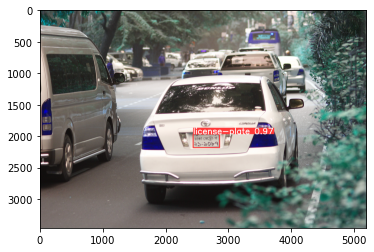

In [113]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

In [115]:
result.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,2427.910645,1967.391724,2848.9021,2181.733887,0.966565,0,license-plate


In [116]:
location = result.xyxy[0][0]
location_arr = []

In [117]:
for bound in location:
    location_arr.append(int(bound.item()))

In [118]:
location_arr

[2427, 1967, 2848, 2181, 0, 0]

In [119]:
location_arr = location_arr[:4]

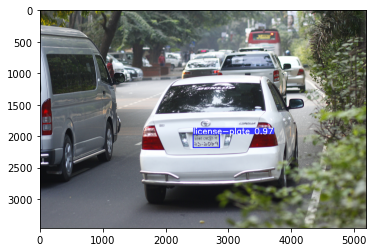

In [120]:
ncopy_img  = image.copy()
cv2.rectangle(ncopy_img, (location_arr[0], location_arr[1]), (location_arr[2], location_arr[3]), (255,0,0), 5)

%matplotlib inline 

plt.imshow(cv2.cvtColor(ncopy_img, cv2.COLOR_BGR2RGB))


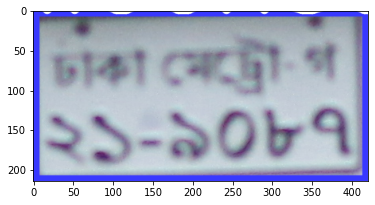

In [121]:
cropped_image  = image[location_arr[1]:location_arr[3], location_arr[0]:location_arr[2]]

%matplotlib inline 

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))



In [123]:
sharp_croped_img = F.adjust_sharpness(cropped_image, 5)

TypeError: img should be PIL Image. Got <class 'numpy.ndarray'>

In [66]:
x = location.xcenter[0]
y = location.ycenter[0]
w = location.width[0]
h = location.height[0]

In [67]:
x

485.819580078125

In [69]:
cropped_image = torchvision.transforms.functional.crop(image, x, y, h, w)

TypeError: img should be PIL Image. Got <class 'str'>

cropped_image = torchvision.transforms.functional.crop(img: image, top: x, left: y, height: h, width: w)

In [49]:
print(xmin[0])

432.6435852050781


In [61]:
(x1, y1) = (np.min(xmin), np.min(ymin))
(x2, y2) = (np.max(xmax), np.max(ymax))

cropped_img = img[x1:x2+1, y1:y2+1]

TypeError: slice indices must be integers or None or have an __index__ method

In [14]:
# result.save(save_dir='G:/CSE_498r/project2/')

In [15]:
# torch.save(model01, 'G:/CSE_498r/project/model.py')
path = "G:/CSE_498r/project/vid_test02.mp4"

In [16]:
# !cd yolov5 && python model01 --source path

In [17]:
# Open the video
cap = cv2.VideoCapture("vid_test02.mp4")
ret, frame = cap.read()

cap.release()
    

In [18]:
result = model01(frame)

In [27]:
result.print()

image 1/1: 989x1532 1 license-plate
Speed: 62.1ms pre-process, 57.1ms inference, 5.0ms NMS per image at shape (1, 3, 416, 640)


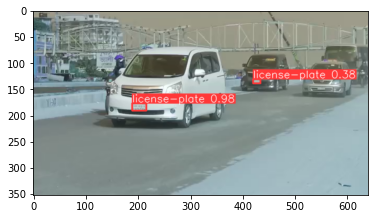

In [20]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

In [34]:
result.crop(save=True, save_dir='G:/CSE_498r/project/test_vid', exist_ok=False)

Saved 1 image to G:\CSE_498r\project\test_vid4
Saved results to G:\CSE_498r\project\test_vid4



[{'box': [tensor(432.64359, device='cuda:0'),
   tensor(597.98206, device='cuda:0'),
   tensor(538.99561, device='cuda:0'),
   tensor(657.79370, device='cuda:0')],
  'conf': tensor(0.95360, device='cuda:0'),
  'cls': tensor(0., device='cuda:0'),
  'label': 'license-plate 0.95',
  'im': array([[[229, 227, 227],
          [229, 227, 227],
          [229, 227, 227],
          ...,
          [ 56,  56, 255],
          [ 56,  56, 255],
          [ 56,  56, 255]],
  
         [[229, 227, 227],
          [229, 227, 227],
          [229, 227, 227],
          ...,
          [ 56,  56, 255],
          [ 56,  56, 255],
          [ 56,  56, 255]],
  
         [[228, 226, 226],
          [228, 226, 226],
          [228, 226, 226],
          ...,
          [ 56,  56, 255],
          [ 56,  56, 255],
          [ 56,  56, 255]],
  
         ...,
  
         [[ 28,  32,  43],
          [ 27,  31,  42],
          [ 26,  30,  41],
          ...,
          [121, 114, 121],
          [146, 139, 146],
     

In [21]:
# ret, frame = cap.read()

# cap.release()
    
# plt.imshow(frame[:,:,::-1]) # OpenCV uses BGR, whereas matplotlib uses RGB
# plt.show()


In [22]:

# # Get the frames per second (fps) of the video
# fps = cap.get(cv2.CAP_PROP_FPS)

# # Define the codec and create a video writer object
# # fourcc = cv2.VideoWriter_fourcc(*"mp4v")
# # out = cv2.VideoWriter("output.mp4", fourcc, fps, (640, 352))

# # Loop through each frame of the video
# while cap.isOpened():
#     # Read the next frame
#     ret, frame = cap.read()

#     # Break if the video has ended
#     if not ret:
#         break

#     # Preprocess the frame
# #     frame = preprocess(frame)

#     # Convert the frame to a PyTorch tensor
#     frame = torch.from_numpy(frame).unsqueeze(0)

#     # Run the frame through the model
#     output = model01(frame)

#     # Postprocess the output
#     output = postprocess(output)

#     # Write the output frame to the video
#     out.write(output)

# # Release the video objects
# cap.release()
# out.release()